# Practica 1.1. Manipuación de datos

## Objetivo

En esta práctica, aprenderás a aplicar técnicas de análisis de datos utilizando Pandas para explorar un dataset relacionado con la salud mental. El objetivo es que pongas en práctica tus habilidades de manipulación, limpieza y análisis de datos para obtener conclusiones interesantes.

Escribe aquí tu reporte

In [2]:
import pandas as pd

Paso 1: Carga del Dataset
Primero, vas a cargar el archivo CSV que contiene la información sobre diferentes factores que influyen
en la salud mental. Utiliza la biblioteca Pandas para leer el archivo y observa las primeras filas del dataset. Esto te ayudará a familiarizarte con la información que vas a analizar

Preguntas:
¿Cuántos registros y columnas tiene el dataset?
R: 1200 Filas y 21 columnas

¿Qué tipo de datos predominan?
R: datos numéricos (enteros y decimales)


In [ ]:
#Se carga el dataset con la funcion de pandas read_csv
df=pd.read_csv('./dataset/mental_health.csv')

df

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,23,Female,Other,Student,5.1,0.1,7,16,15,5,...,0,Occasional,0,0,NaN,2,8,7,6,5
1196,43,Female,Master's,Employed,8.9,0.4,9,19,4,9,...,0,NaN,0,1,NaN,8,9,7,6,4
1197,71,Female,PhD,Retired,6.0,0.1,2,15,4,2,...,0,NaN,0,1,NaN,2,9,9,3,7
1198,21,Male,Other,Employed,8.5,2.7,8,12,20,2,...,1,NaN,0,0,NaN,8,5,1,3,7


In [ ]:
#Esta función nos muenstra las variables del dataframe y el tipo de dato
print(df.dtypes)

Age                                int64
Gender                            object
Education_Level                   object
Employment_Status                 object
Sleep_Hours                      float64
Physical_Activity_Hrs            float64
Social_Support_Score               int64
Anxiety_Score                      int64
Depression_Score                   int64
Stress_Level                       int64
Family_History_Mental_Illness      int64
Chronic_Illnesses                  int64
Medication_Use                    object
Therapy                            int64
Meditation                         int64
Substance_Use                     object
Financial_Stress                   int64
Work_Stress                        int64
Self_Esteem_Score                  int64
Life_Satisfaction_Score            int64
Loneliness_Score                   int64
dtype: object


Paso 2: Exploración Inicial
Ahora que ya tienes los datos cargados, es momento de explorar un poco más. Consulta información
general como el tipo de datos en cada columna, cuántos datos no nulos hay, y revisa las primeras filas.
También obtén estadísticas básicas como la media y el rango de los datos. Esto te ayudará a detectar si
algo llama la atención o si hay datos fuera de lo normal.


Preguntas:
¿Existen columnas que podrían ser categóricas, pero aparecen como tipo object?
R: Si, existen columnas que pueden ser categóricas, por ejemplo:
Gender, Education_Level, Employment_Status, Medication_Use, Substance_Use

¿Hay valores que parecen inconsistentes o fuera de rango?
R: Si, hay valores atípicos, como en la columnas sleep_Hours, Physical_Activity_Hrs

Para buscar valores atipicos usé las graficas BoxPlot

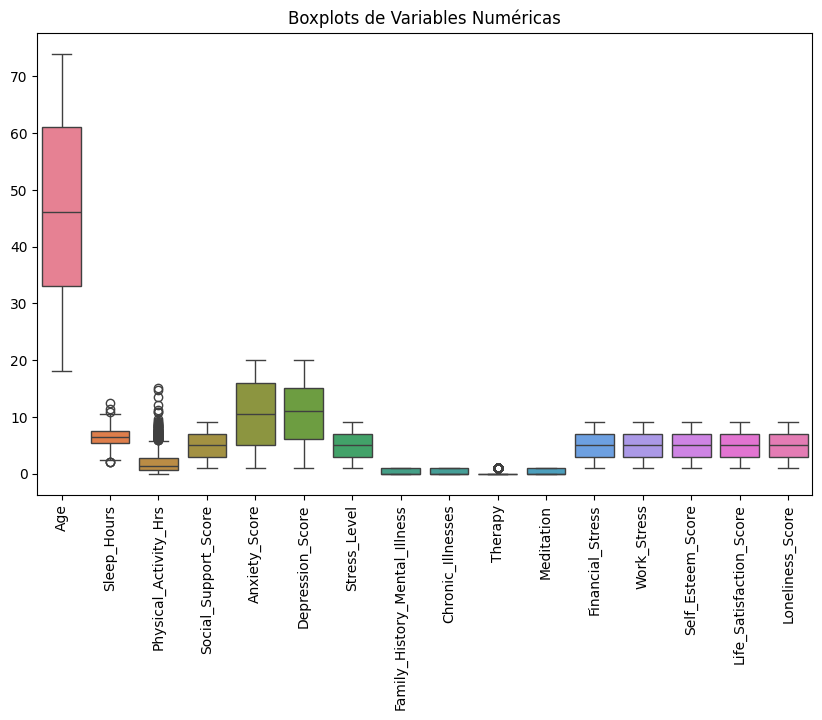

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para columnas numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=90)
plt.title("Boxplots de Variables Numéricas")
plt.show()

Paso 3: Limpieza de Datos
Es hora de "limpiar" los datos. Revisa si hay valores nulos o datos duplicados. Decide qué hacer con ellos:
¿los eliminarás, los reemplazarás o aplicarás otra estrategia? También asegúrate de que los tipos de datos
de cada columna son correctos y convierte aquellos que no estén en el formato adecuado.
 

Preguntas:
¿Qué porcentaje del dataset contiene valores nulos?
R: 6.27%

¿Qué estrategia decidiste aplicar para tratar los valores nulos y por qué?
R: Se Utilizó la función df.isnull().sum() para buscar los valores nulos. Decidí no eliminar estas filas, ya que contienen columnas con datos relevantes y necesarios para el análisis.


En cuanto a los valores duplicados me arrojo la función "df[df.duplicated()]
" cero filas, lo que indica que no hay duplicados

In [9]:
#Valores nulos


nulos = df.isnull().sum()
print("Valores nulos por columna:")
print(nulos)
print()
#Valores duplicados
duplicados = df[df.duplicated()]

print(duplicados)

Valores nulos por columna:
Age                                0
Gender                             0
Education_Level                    0
Employment_Status                  0
Sleep_Hours                        0
Physical_Activity_Hrs              0
Social_Support_Score               0
Anxiety_Score                      0
Depression_Score                   0
Stress_Level                       0
Family_History_Mental_Illness      0
Chronic_Illnesses                  0
Medication_Use                   747
Therapy                            0
Meditation                         0
Substance_Use                    834
Financial_Stress                   0
Work_Stress                        0
Self_Esteem_Score                  0
Life_Satisfaction_Score            0
Loneliness_Score                   0
dtype: int64

Empty DataFrame
Columns: [Age, Gender, Education_Level, Employment_Status, Sleep_Hours, Physical_Activity_Hrs, Social_Support_Score, Anxiety_Score, Depression_Score, Stress_Level, Fa

In [10]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = df.isnull().mean() * 100

# Mostrar el porcentaje de valores nulos por columna
print("Porcentaje de valores nulos por columna:")
print(porcentaje_nulos)

# Calcular el porcentaje total de valores nulos en todo el dataset
porcentaje_total_nulos = df.isnull().mean().mean() * 100
print(f"\nPorcentaje total de valores nulos en el dataset: {porcentaje_total_nulos:.2f}%")

Porcentaje de valores nulos por columna:
Age                               0.00
Gender                            0.00
Education_Level                   0.00
Employment_Status                 0.00
Sleep_Hours                       0.00
Physical_Activity_Hrs             0.00
Social_Support_Score              0.00
Anxiety_Score                     0.00
Depression_Score                  0.00
Stress_Level                      0.00
Family_History_Mental_Illness     0.00
Chronic_Illnesses                 0.00
Medication_Use                   62.25
Therapy                           0.00
Meditation                        0.00
Substance_Use                    69.50
Financial_Stress                  0.00
Work_Stress                       0.00
Self_Esteem_Score                 0.00
Life_Satisfaction_Score           0.00
Loneliness_Score                  0.00
dtype: float64

Porcentaje total de valores nulos en el dataset: 6.27%


Paso 4: Análisis Estadístico
En este paso, vas a calcular algunas estadísticas básicas para tres columnas importantes: Anxiety_Score,
Depression_Score y Stress_Level. Queremos saber cuál es la media, la mediana y la desviación estándar
de estos valores. Esto te permitirá tener una idea general sobre cómo están distribuidos estos puntajes

¿Cuál de los tres puntajes tiene mayor variabilidad?
R: Anxiety_Score, ya que es la que tiene la mayor desviación estándar de 5.91

¿Qué observas sobre la diferencia entre media y mediana en cada caso?
R: La diferencia entre la media y la mediana en los datos obtenidos datos es mínima, lo que indica que
las distribuciones de Anxiety_Score, Depression_Score y Stress_Level son simétricas, sin un sesgo hacia
valores bajos o altos

¿Qué te dice esto sobre la distribución?
R: Anxiety_Score, Depression_Score y Stress_Level parecen ser simétricas o casi simétricas

In [11]:
# Calcular la media, la mediana y la desviación estándar para las columnas seleccionadas
columnas = ['Anxiety_Score', 'Depression_Score', 'Stress_Level']

# Media
media = df[columnas].mean()

# Mediana
mediana = df[columnas].median()

# Desviación estándar
desviacion_estandar = df[columnas].std()

# Mostrar los resultados
print("Media:")
print(media)
print("\nMediana:")
print(mediana)
print("\nDesviación estándar:")
print(desviacion_estandar)

Media:
Anxiety_Score       10.470000
Depression_Score    10.674167
Stress_Level         5.000833
dtype: float64

Mediana:
Anxiety_Score       10.5
Depression_Score    11.0
Stress_Level         5.0
dtype: float64

Desviación estándar:
Anxiety_Score       5.911138
Depression_Score    5.632889
Stress_Level        2.538281
dtype: float64


Paso 5: Filtrado de Datos
Aquí vas a enfocarte en subconjuntos específicos del dataset. Primero, identifica a las personas que tienen
un puntaje alto en ansiedad (puedes elegir un valor alto, como por encima de 80). Luego, clasifica a las
personas según las horas de sueño que reportan (menos de 5 horas, entre 5 y 7 horas, y más de 7 horas)
y analiza cómo varía el nivel de estrés en cada grupo.

 
Preguntas:
¿Qué porcentaje del total presenta niveles altos de ansiedad?
R: 27.33%

¿Existe una relación visible entre las horas de sueño y el nivel de estrés?
R:
Menos de 5 horas= Más estrés. El grupo con menos de 5 horas tiene el mayor nivel de estrés.
Entre 5 y 7 horas= Menos estrés. Este grupo tiene el menor nivel de estrés.
Más de 7 horas= Aumento leve del estrés.

El máximo  de valores para ansiedad era de 20, se tomó como un valor alto de 16

In [ ]:
nivelAltoAnsiedad = 16  # Ajustado al máximo de 20 en los datos, ya que no existe valores por encima de 80.

# Filtrar personas con ansiedad alta y crear una copia para evitar la advertencia
df_ansiedad = df[df['Anxiety_Score'] >= nivelAltoAnsiedad].copy()
 

#Funcion para clasificar las horas de sueño
def clasificarSueño(horas):
    if horas < 5:
        return 'Menos de 5 horas'
    elif 5 <= horas <= 7:
        return 'Entre 5 y 7 horas'
    else:
        return 'Más de 7 horas'

df_ansiedad.loc[:, 'GrupoSueño'] = df_ansiedad['Sleep_Hours'].apply(clasificarSueño)

# Se agrupa para Analizar la variación del nivel de estrés en cada grupo
estresGrupo = df_ansiedad.groupby('GrupoSueño')['Stress_Level'].mean().reset_index()

print(estresGrupo)


          GrupoSueño  Stress_Level
0  Entre 5 y 7 horas      4.895706
1   Menos de 5 horas      5.816327
2     Más de 7 horas      5.232759


In [13]:
#Se obtiene el porcentaje de ansiendad
porcentAnsiedad = (len(df_ansiedad) / len(df)) * 100
print(f"% de personas con ansiedad alta: {porcentAnsiedad:.2f}%")

% de personas con ansiedad alta: 27.33%


Paso 6: Ordenamiento
Ahora vas a ordenar el dataset para encontrar a las personas con mayor satisfacción de vida y menor
puntaje de soledad. ¿Puedes descubrir algún patrón? ¿Qué tienen en común estas personas?


Preguntas:
¿Qué características comunes encuentras en estas 10 personas?
R: Entre las características más comunes son:
Todas tienen puntaje de 9 en Satisfacción de vida
Todas tienen 1 en puntaje de Soledad

¿Qué hipótesis podrías plantear sobre el vínculo entre satisfacción y soledad?
R: Las personas con una alta satisfacción de vida tienden a tener bajos niveles de soledad, ya que tienen
mayor apoyo social y mayor bienestar emocional.

In [14]:
#Se Ordena Life_Satisfaction_Score y Loneliness_Score
df_ordenado  = df.sort_values(by=['Life_Satisfaction_Score', 'Loneliness_Score'],
    ascending=[False, True]
)

# Mostrar las 10 personas con más satisfacción de vida y menor puntaje de soledad
personas10 = df_ordenado .head(10)
print(personas10)

     Age  Gender Education_Level Employment_Status  Sleep_Hours  \
14    53    Male      Bachelor's          Employed          4.9   
33    44    Male      Bachelor's          Employed          7.2   
83    61  Female             PhD        Unemployed          5.7   
92    31  Female             PhD          Employed          6.8   
103   43  Female           Other           Student          5.5   
217   25  Female        Master's          Employed          6.9   
262   49  Female     High School           Retired          3.6   
391   44   Other             PhD           Retired          7.4   
438   41  Female        Master's          Employed          5.4   
675   29    Male           Other        Unemployed          8.0   

     Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
14                     1.5                     5             17   
33                     1.7                     3              4   
83                     1.8                     4             

Paso 7: Guardado de Resultados
Filtra el dataset para encontrar a las personas que reciben terapia y que además tienen un nivel bajo de
estrés (por debajo de la mediana). Una vez que tengas este subconjunto, guarda la información en un
nuevo archivo CSV para tenerlo listo para futuros análisis.

Preguntas:
¿Cuántas personas cumplen con ambas condiciones?
R: 108 Personas

¿Qué conclusiones puedes hacer sobre la relación entre terapia y nivel de estrés en este conjunto?
R: Las personas en terapia presentan niveles de estrés inferiores a la mediana

In [16]:
#Se filtran las personas que reciben terapida con valor 1
df_terapia = df[df['Therapy'] == 1]

#Se obtiene la mediana de la columna  Stress_Level
estresMediana = df_terapia['Stress_Level'].median()

#Se Filtra de Personas con estrés menor que la mediana
df_terapiaBajoEstres = df_terapia[df_terapia['Stress_Level'] < estresMediana]

#Se guarda el dataframe subconjunto en un archivo CSV
df_terapiaBajoEstres.to_csv('terapia_bajo_estres.csv', index=False)

df_terapiaBajoEstres

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7
12,41,Female,PhD,Employed,9.4,1.3,3,11,7,2,...,0,Occasional,1,0,NaN,4,1,2,8,5
22,61,Female,High School,Employed,8.3,7.6,6,6,15,3,...,0,NaN,1,0,NaN,3,6,4,4,7
34,59,Female,Master's,Student,6.6,0.8,8,2,1,4,...,0,Regular,1,0,NaN,2,1,6,3,9
40,61,Male,PhD,Unemployed,7.1,3.4,8,17,8,3,...,0,Occasional,1,1,NaN,4,3,2,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,43,Male,High School,Student,5.8,3.8,3,7,20,3,...,1,NaN,1,0,Occasional,2,8,2,8,7
1161,26,Female,High School,Student,8.0,2.2,5,10,17,4,...,0,NaN,1,0,NaN,9,3,3,2,4
1163,20,Female,Master's,Employed,6.7,0.2,7,17,8,2,...,1,NaN,1,0,NaN,9,4,9,4,9
1174,45,Female,PhD,Unemployed,3.7,1.6,9,3,3,2,...,0,NaN,1,1,NaN,9,6,3,5,3


Paso 8: Visualización Opcional
Para finalizar, crea un gráfico que muestre la media de autoestima (Self_Esteem_Score) según el género.
Observa si hay diferencias entre géneros y reflexiona sobre los factores que podrían influir en esos
resultados.

Preguntas:
¿Hay diferencias notables entre los géneros en cuanto a autoestima?
R: las mujeres tienen una autoestima un poco más alta que los hombres y las personas no binarias y las
que se identifican con "Otro" tienen autoestimas más bajas.

¿Qué factores del dataset podrían explicar estas diferencias?
R: Las horas de sueño (Sleep_Hours) es fundamental para el bienestar emocional y la autoestima, la
actividad física (Physical_Activity_Hrs) regular está asociado con aumento de autoestima, el soporte
social (Social_Support_Score) esta relacionado con una mejor autoestima y el nivel de ansiedad tiene un
impacto negativo en la autoestima.

In [ ]:
#Se agrupa por medio del genero los valores de la autoestima
mediaAutoestima = df.groupby('Gender')['Self_Esteem_Score'].mean()

 
print(mediaAutoestima)

Gender
Female        5.231986
Male          5.023077
Non-Binary    4.600000
Other         3.428571
Name: Self_Esteem_Score, dtype: float64


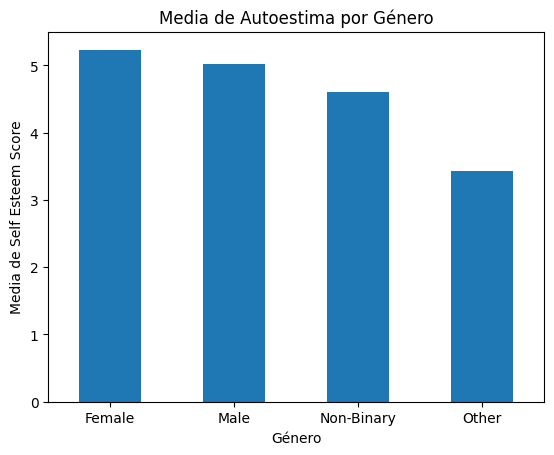

In [18]:
#Se grafica la agrupacion que se hizo de mediaAutoestima
mediaAutoestima.plot(kind='bar')
plt.title('Media de Autoestima por Género')
plt.xlabel('Género')
plt.ylabel('Media de Self Esteem Score')
plt.xticks(rotation=0)
plt.show()